In [1]:
import sys

sys.path.append('../src')

# Utility Maximization and Budget Constraint

One classic optimization problem in economics that can be solved using optimization methods is the problem of utility maximization subject to a budget constraint. The consumer aims to maximize their utility $U(x_{1}, x_{2})$. A common form of the utility function is the Cobb-Douglas utility function:

$$U(x_{1}, x_{2}) = x_{1}^{\alpha}x_{2}^{\beta}$$

where $x_{1}$ and $x_{2}$ are the quantities of two goods consumed, and $\alpha$ and $\beta$ are positive constants.

The budget constraint is given by:

$$p_{1}x_{1} + p_{2}x_{2} \leq I$$

where $p_{1}$ and $p_{2}$ are the prices of goods 1 and 2, respectively, and $I$ is the consumer's income. 

So, we can define this optimization problem as:

$$\max_{x_{1}, x_{2}} x_{1}^{\alpha}x_{2}^{\beta}$$

subject to:

$$p_{1}x_{1} + p_{2}x_{2} \leq I$$

where $x_{1} \geq 0$ and $x_{2} \geq 0$.

In this example we define the following parameters:

- $\alpha = 0.5$
- $\beta = 0.5$
- $p_{1} = 2$
- $p_{2} = 5$
- $I = 10$

## Implementation

In [2]:
import jax.numpy as jnp

alpha = 0.5
beta = 0.5
p1 = 2
p2 = 5
income = 10

def cobb_douglas(x, alpha=alpha, beta=beta):
    return x[0] ** alpha * x[1] ** beta

def budget_constraint(x, p1=p1, p2=p2, income=income):
    return p1 * x[0] + p2 * x[1] - income

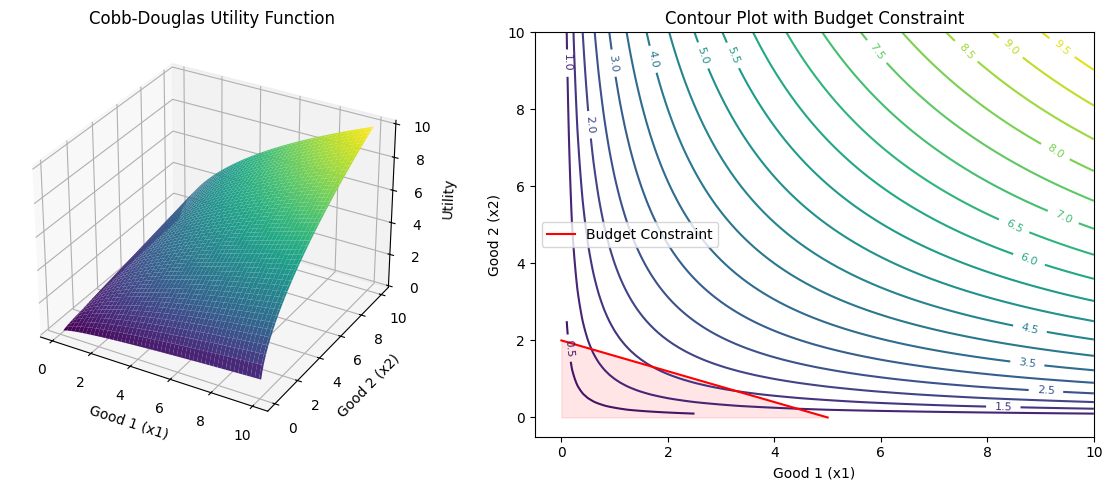

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Grid for plotting
x = np.linspace(0.1, 10, 100)
y = np.linspace(0.1, 10, 100)
X, Y = np.meshgrid(x, y)
Z = cobb_douglas((X, Y))

# 3D Plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title('Cobb-Douglas Utility Function')
ax.set_xlabel('Good 1 (x1)')
ax.set_ylabel('Good 2 (x2)')
ax.set_zlabel('Utility')

# Contour plot with budget constraint
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_title('Contour Plot with Budget Constraint')
ax2.set_xlabel('Good 1 (x1)')
ax2.set_ylabel('Good 2 (x2)')

# Budget constraint line
x_budget = np.linspace(0, income/p1, 100)
y_budget = (income - p1*x_budget) / p2
ax2.plot(x_budget, y_budget, 'r', label='Budget Constraint')
ax2.fill_between(x_budget, 0, y_budget, color='red', alpha=0.1)
ax2.legend()

plt.tight_layout()
plt.show()

In [4]:
from optymus import Optimizer

opt = Optimizer(
    f_obj=cobb_douglas,
    f_constr=budget_constraint,
    x0=jnp.array([0.5, 0.7]),
    method='gradient_descent',
    maximize=True,
    max_iter=10,
)

Gradient Descent 0: 100%|██████████| 10/10 [00:00<00:00, 22.04it/s]


In [5]:
opt.print_report()

,Method,Initial Guess,Optimal Solution,Objective Function Value,Number of Iterations
Optimization Results,gradient_descent,"[0.5, 0.7]","[1.5866483063337715, 1.3711006873714595]",-1.4749422305402324,10


In [6]:
opt.create_dashboard()

/tmp/ipykernel_78309/1185288172.py:10: RuntimeWarning:

invalid value encountered in sqrt

